# Netflix Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [2]:
df = pd.read_csv("Netflix.csv")

In [3]:
df

,SSSSS,Open,High,Low,Close,Adj Close,Volume
0,5/23/2002,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,5/24/2002,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,5/28/2002,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,5/29/2002,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,5/30/2002,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
...,...,...,...,...,...,...,...
4869,9/24/2021,592.500000,592.979980,583.640015,592.390015,592.390015,2124800
4870,9/27/2021,587.950012,593.580017,576.929993,592.640015,592.640015,2504700
4871,9/28/2021,589.000000,599.539978,580.159973,583.849976,583.849976,4431100
4872,9/29/2021,589.010010,609.880005,588.010010,599.059998,599.059998,6221000


In [4]:
df.head()

,SSSSS,Open,High,Low,Close,Adj Close,Volume
0,5/23/2002,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,5/24/2002,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,5/28/2002,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,5/29/2002,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,5/30/2002,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [5]:
sns.set(rc={'figure.figsize' : (10,5)})

In [6]:
df['SSSSS'] = pd.to_datetime(df['SSSSS'])
df = df.set_index('SSSSS')
df.head()

,Open,High,Low,Close,Adj Close,Volume
SSSSS,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


Text(0.5, 1.0, 'volume of stock versus time')

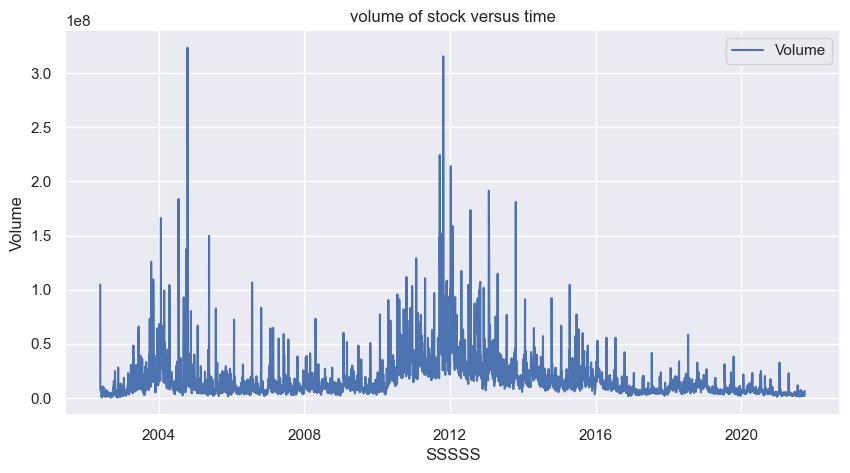

In [7]:
sns.lineplot(x=df.index, y = df['Volume'],label = 'Volume' )
plt.title('volume of stock versus time') 

<Axes: title={'center': 'Netflix Stock Price'}, xlabel='SSSSS'>

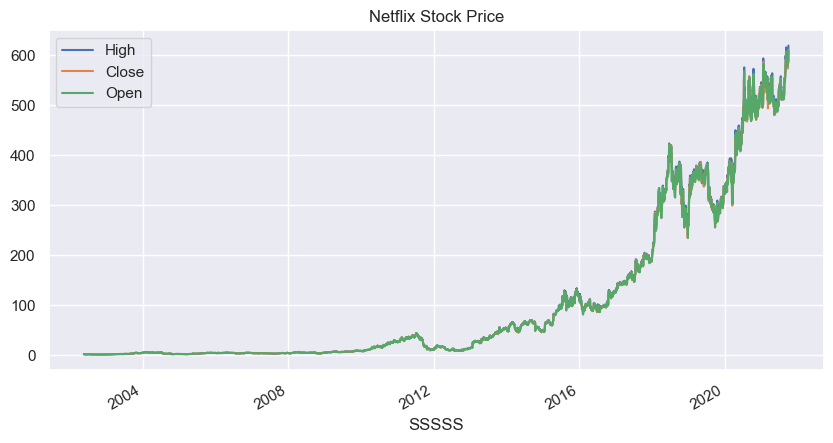

In [8]:
df.plot(y=['High','Close','Open'],title = 'Netflix Stock Price')

In [9]:
print(df.describe())

              Open         High          Low        Close    Adj Close  \
count  4874.000000  4874.000000  4874.000000  4874.000000  4874.000000   
mean    104.644811   106.243736   103.006660   104.686524   104.686524   
std     155.886656   158.173217   153.546958   155.940368   155.940368   
min       0.377857     0.410714     0.346429     0.372857     0.372857   
25%       3.901429     3.977143     3.835357     3.905714     3.905714   
50%      21.386429    21.816429    20.935714    21.233572    21.233572   
75%     125.445000   126.592499   122.987499   125.097502   125.097502   
max     608.049988   619.000000   608.049988   610.340027   610.340027   

             Volume  
count  4.874000e+03  
mean   1.681687e+07  
std    1.937625e+07  
min    2.856000e+05  
25%    6.301225e+06  
50%    1.084630e+07  
75%    2.016192e+07  
max    3.234140e+08  


# Plot the closing price

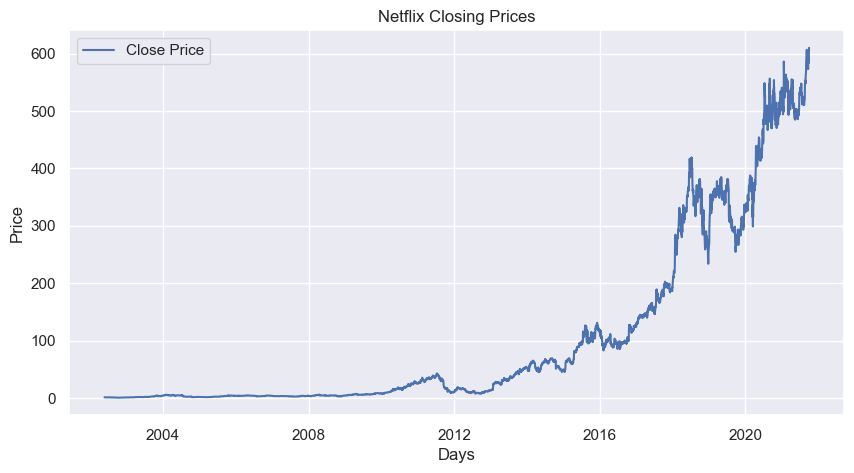

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Close Price')
plt.title('Netflix Closing Prices')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

# Calculate the average closing price

In [11]:
average_close = df['Close'].mean()
print(f"Average closing price: {average_close}")

Average closing price: 104.6865243391465


Find the day with the highest closing price

In [12]:
max_close_day = df[df['Close'] == df['Close'].max()]
print("Day with highest closing price:")
print(max_close_day)

Day with highest closing price:
                  Open   High         Low       Close   Adj Close   Volume
SSSSS                                                                     
2021-09-30  608.049988  619.0  608.049988  610.340027  610.340027  6612600


# Calculate the daily price range (High - Low)

In [13]:
df['Range'] = df['High'] - df['Low']
print(df[['High', 'Low', 'Range']].head())

                High       Low     Range
SSSSS                                   
2002-05-23  1.242857  1.145714  0.097143
2002-05-24  1.225000  1.197143  0.027857
2002-05-28  1.232143  1.157143  0.075000
2002-05-29  1.164286  1.085714  0.078572
2002-05-30  1.107857  1.071429  0.036428


# Plot the daily trading volume

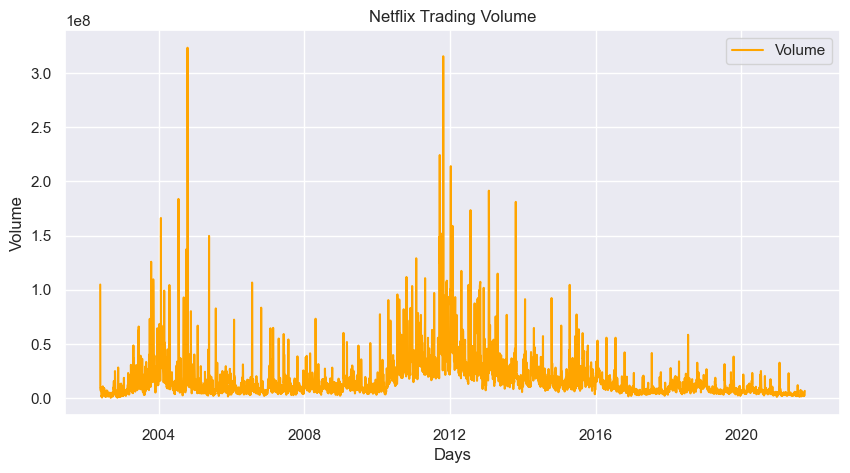

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(df['Volume'], label='Volume', color='orange')
plt.title('Netflix Trading Volume')
plt.xlabel('Days')
plt.ylabel('Volume')
plt.legend()
plt.show()

# Find the correlation between 'Open' and 'Close' prices

In [16]:
correlation = df['Open'].corr(df['Close'])
print(f"Correlation between Open and Close prices: {correlation}")

Correlation between Open and Close prices: 0.9997079040274441


# Add a column for daily percentage change in closing price

In [17]:
df['Pct_Change'] = df['Close'].pct_change() * 100
print(df[['Close', 'Pct_Change']].head())

               Close  Pct_Change
SSSSS                           
2002-05-23  1.196429         NaN
2002-05-24  1.210000    1.134292
2002-05-28  1.157143   -4.368347
2002-05-29  1.103571   -4.629678
2002-05-30  1.071429   -2.912545


# Plot the percentage change

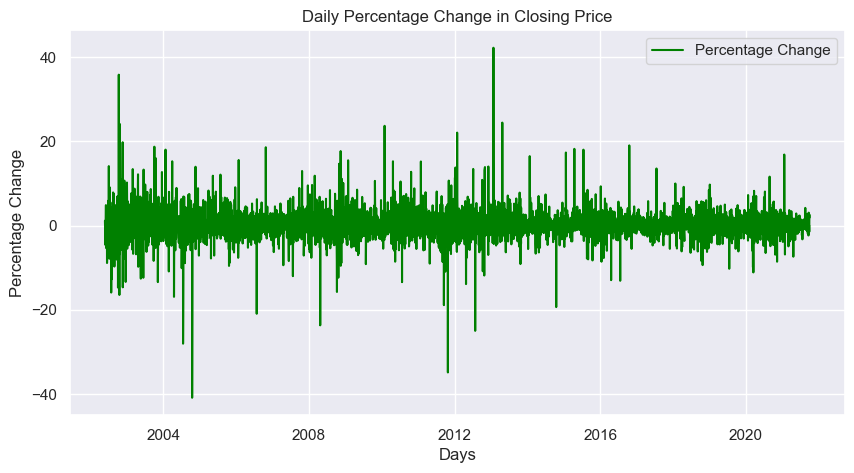

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(df['Pct_Change'], label='Percentage Change', color='green')
plt.title('Daily Percentage Change in Closing Price')
plt.xlabel('Days')
plt.ylabel('Percentage Change')
plt.legend()
plt.show()

# Calculate the rolling 20-day average closing price

In [19]:
df['20_Day_MA'] = df['Close'].rolling(window=20).mean()
print(df[['Close', '20_Day_MA']].head(25))

               Close  20_Day_MA
SSSSS                          
2002-05-23  1.196429        NaN
2002-05-24  1.210000        NaN
2002-05-28  1.157143        NaN
2002-05-29  1.103571        NaN
2002-05-30  1.071429        NaN
2002-05-31  1.076429        NaN
2002-06-03  1.128571        NaN
2002-06-04  1.117857        NaN
2002-06-05  1.147143        NaN
2002-06-06  1.182143        NaN
2002-06-07  1.118571        NaN
2002-06-10  1.156429        NaN
2002-06-11  1.153571        NaN
2002-06-12  1.092857        NaN
2002-06-13  1.082857        NaN
2002-06-14  0.986429        NaN
2002-06-17  0.922143        NaN
2002-06-18  0.910714        NaN
2002-06-19  0.951429        NaN
2002-06-20  0.957143   1.086143
2002-06-21  0.979286   1.075286
2002-06-24  0.978571   1.063714
2002-06-25  0.964286   1.054071
2002-06-26  0.988571   1.048321
2002-06-27  0.943571   1.041929


# Count the number of trading days in the dataset

In [20]:
# Count the number of trading days
num_days = df.shape[0]
print("Number of trading days:", num_days)


Number of trading days: 4874


# Identify the day with the highest volume

In [21]:
max_volume_day = df.loc[df['Volume'].idxmax()]
print("Day with highest trading volume:")
print(max_volume_day)

Day with highest trading volume:
Open          1.432857e+00
High          1.641429e+00
Low           1.422857e+00
Close         1.471429e+00
Adj Close     1.471429e+00
Volume        3.234140e+08
Range         2.185720e-01
Pct_Change   -4.090647e+01
20_Day_MA     2.384071e+00
Name: 2004-10-15 00:00:00, dtype: float64


# Plot the closing price histogram

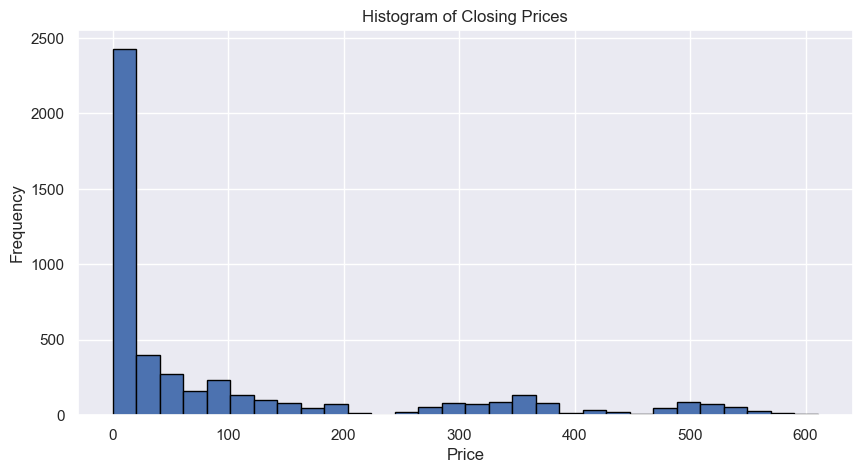

In [22]:
plt.figure(figsize=(10, 5))
plt.hist(df['Close'], bins=30, edgecolor='black')
plt.title('Histogram of Closing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Create a scatter plot of high vs. low prices

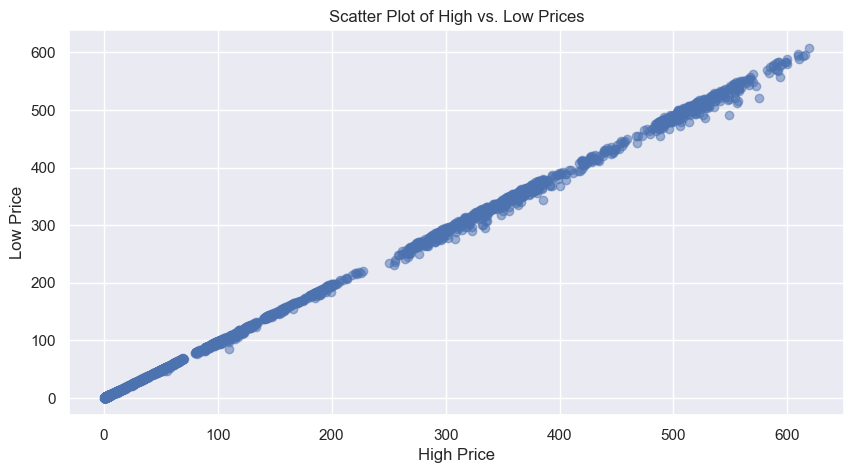

In [23]:
plt.figure(figsize=(10, 5))
plt.scatter(df['High'], df['Low'], alpha=0.5)
plt.title('Scatter Plot of High vs. Low Prices')
plt.xlabel('High Price')
plt.ylabel('Low Price')
plt.show()

In [25]:
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
labels = ['0-100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700-800', '800-900', '900-1000']


In [26]:
df['Price_Range'] = pd.cut(df['Close'], bins=bins, labels=labels, right=False)


In [27]:
volume_by_range = df.groupby('Price_Range')['Volume'].sum()

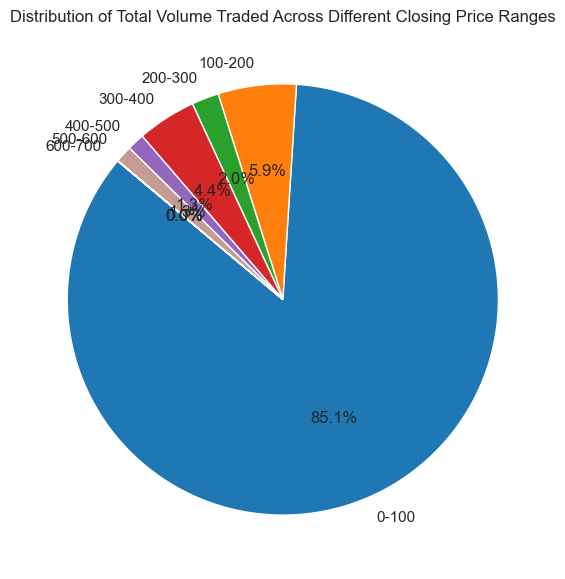

In [28]:
plt.figure(figsize=(10, 7))
volume_by_range.plot.pie(autopct='%1.1f%%', startangle=140, colormap='tab20')
plt.title('Distribution of Total Volume Traded Across Different Closing Price Ranges')
plt.ylabel('')  # Hide the y-label
plt.show()

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv("Netflix.csv")

In [35]:
df

,SSSSS,Open,High,Low,Close,Adj Close,Volume
0,5/23/2002,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,5/24/2002,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,5/28/2002,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,5/29/2002,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,5/30/2002,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
...,...,...,...,...,...,...,...
4869,9/24/2021,592.500000,592.979980,583.640015,592.390015,592.390015,2124800
4870,9/27/2021,587.950012,593.580017,576.929993,592.640015,592.640015,2504700
4871,9/28/2021,589.000000,599.539978,580.159973,583.849976,583.849976,4431100
4872,9/29/2021,589.010010,609.880005,588.010010,599.059998,599.059998,6221000


In [40]:
plt.figure(figsize=(14, 7))

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

Text(0, 0.5, 'Frequency')

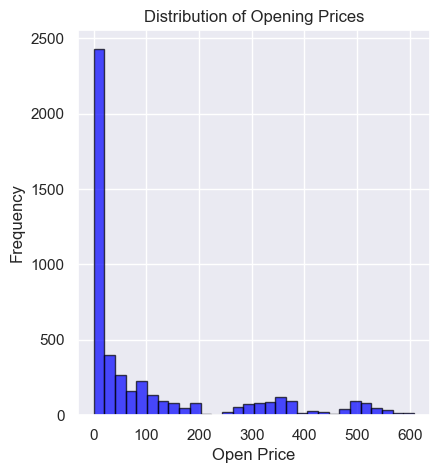

In [41]:
plt.subplot(1, 2, 1)
plt.hist(df['Open'], bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title('Distribution of Opening Prices')
plt.xlabel('Open Price')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

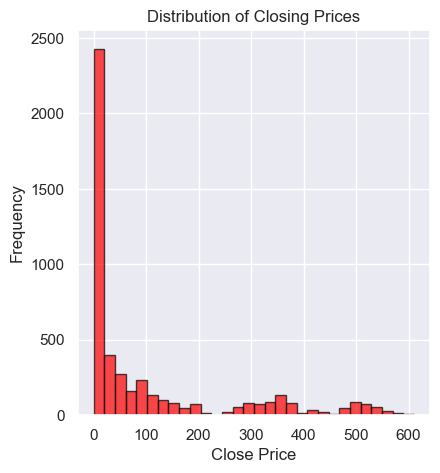

In [42]:

plt.subplot(1, 2, 2)
plt.hist(df['Close'], bins=30, color='red', alpha=0.7, edgecolor='black')
plt.title('Distribution of Closing Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')

In [44]:
plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

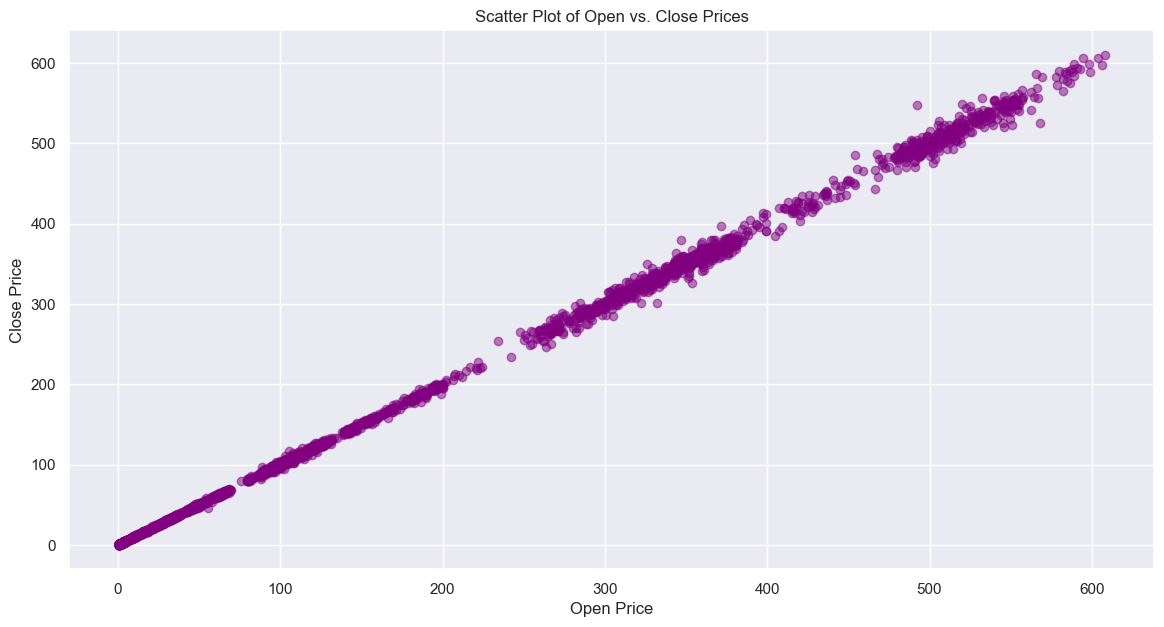

In [45]:
plt.figure(figsize=(14, 7))
plt.scatter(df['Open'], df['Close'], alpha=0.5, color='purple')
plt.title('Scatter Plot of Open vs. Close Prices')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.show()